# Intro a Matplotlib
## Matplotlib = Libreria para graficas cosas matematicas
### Que es Matplotlib?

![alt text](http://matplotlib.org/_static/logo2.png)

Matplotlin es un libreria para crear imagenes 2D de manera facil.

Checate mas en :

* Pagina oficial : http://matplotlib.org/
* Galleria de ejemplo: http://matplotlib.org/gallery.html
* Una libreria mas avanzada que usa matplotlib, Seaborn: http://stanford.edu/~mwaskom/software/seaborn/
* Libreria de visualizacion interactiva: http://bokeh.pydata.org/
* Buenisimo Tutorial: http://www.labri.fr/perso/nrougier/teaching/matplotlib/

Para usar matplotlib, solo tiene que importar el modulo ..tambien te conviene importar numpy pues es muy util

In [2]:
import numpy as np # modulo de computo numerico
import matplotlib.pyplot as plt # modulo de graficas
import pandas as pd # modulo de datos
import seaborn as sns
# esta linea hace que las graficas salgan en el notebook
%matplotlib inline

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Graficas chidas!

In [25]:
def awesome_settings():
    # awesome plot options
    sns.set_style("white")
    sns.set_style("ticks")
    sns.set_context("paper", font_scale=2)
    sns.set_palette(sns.color_palette('Set2'))
    # image stuff
    plt.rcParams['figure.figsize'] = (12.0, 6.0)
    plt.rcParams['savefig.dpi'] = 60
    plt.rcParams['lines.linewidth'] = 3

    return

%config InlineBackend.figure_format='retina'
awesome_settings()

# 1 Crear graficas (plt.plot)
## Un ejemplo "complejo"
Crear graficas es muy facil en matplotlib, aqui va un ejemplo complicado..si entiendes este pedazo de codigo puedes entender el resto.

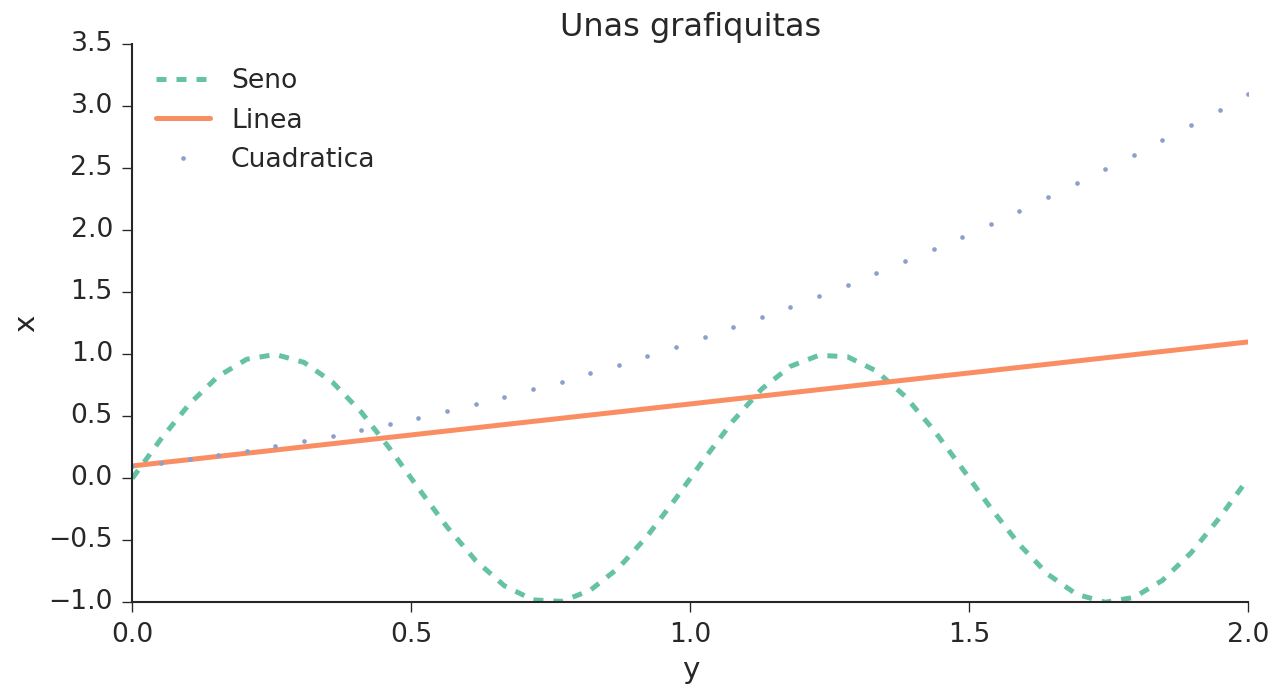

In [29]:
# datos
x = np.linspace(0.0, 2.0, 40)
y1 = np.sin(2*np.pi*x)
y2 = 0.5*x+0.1
y3 = 0.5*x**2+0.5*x+0.1

# a graficas
plt.plot(x,y1,'--',label='Seno')
plt.plot(x,y2,'-',label='Linea')
plt.plot(x,y3,'.',label='Cuadratica')

# estilo
plt.xlabel('y')
plt.ylabel('x')
plt.title('Unas grafiquitas')
plt.legend(loc='best')
sns.despine()
plt.show()

## Ahora por pedazos

Podemos usar la funcion **np.linspace** para crear valores en un rango, por ejemplo si queremos 100 numeros entre 0 y 10 usamos:

Y podemos graficar dos cosas al mismo tiempo:

Que tal si queremos distinguir cada linea? Pues usamos **legend()**, de leyenda..tambien tenemos que agregarles nombres a cada plot

Tambien podemos hacer mas cosas, como dibujar solamente los puntos, o las lineas con los puntos usando **linestyle**:

## Actividad: Haz muchas graficas

Grafica las siguientes curvas:

* Usa x dentro del rango $[-2,2]$. 
*  $e^{-x^2}$
*  $x^2$
* $ cos(2 x) $
* Ponle nombre a cada curva, usa leyendas, titulos y demas informacion.

Pero ademas podemos meter mas informacion, por ejemplo dar colores cada punto, o darle tamanos diferentes:

# Histogramas (**plt.hist**)

Los histogramas nos muestran distribuciones de datos, la forma de los datos, nos muestran el numero de datos de diferentes tipos:

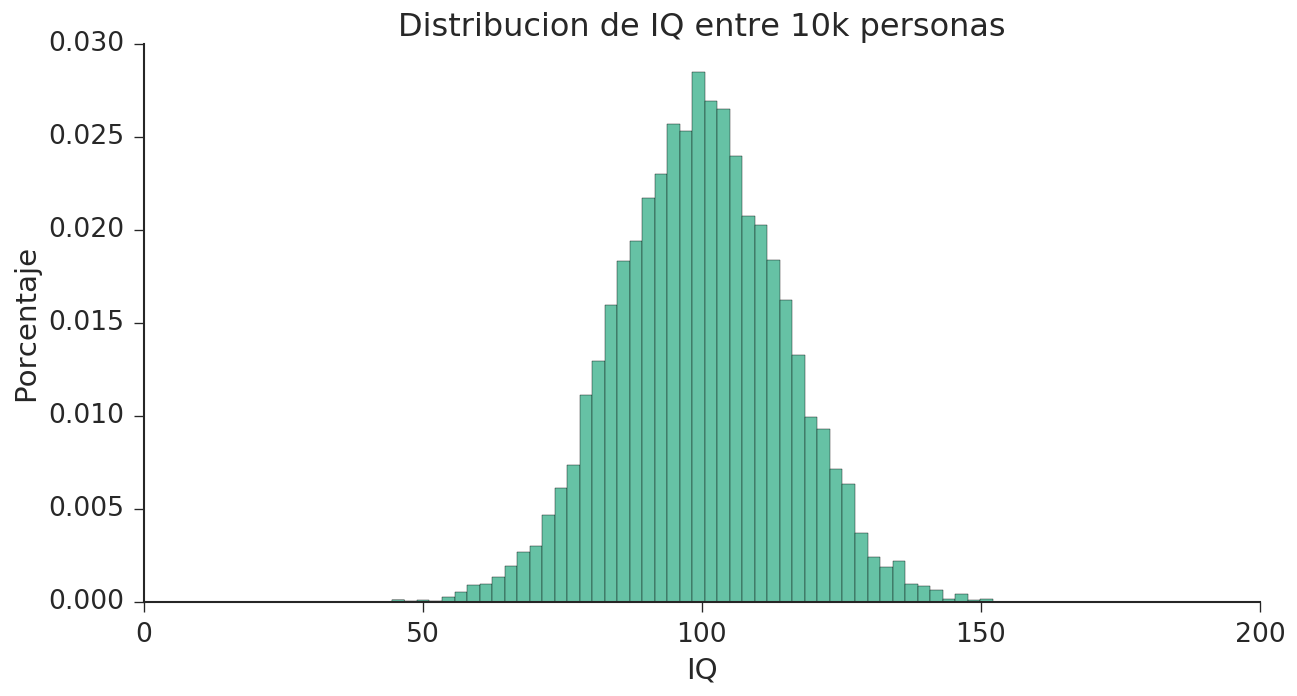

In [35]:
mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)
n, bins, patches = plt.hist(x, 50, normed=1)
plt.ylabel('Porcentaje')
plt.xlabel('IQ')
plt.title('Distribucion de IQ entre 10k personas')
plt.xlim([0,200])
sns.despine()
plt.show()

## Actividad: Convergencia de distirbucion normal

Queremos que grafiques:

* Una distribucion normal creada con $10^n$ numeros aleatorios donde $n=1,2,3,4,5,6$
* Poner nombre a cada histograma.
* Titulo, leyenda y toda la demas informacion.
* Cambia **plt.hist** por **sns.distplot** y ve la diferencia.
